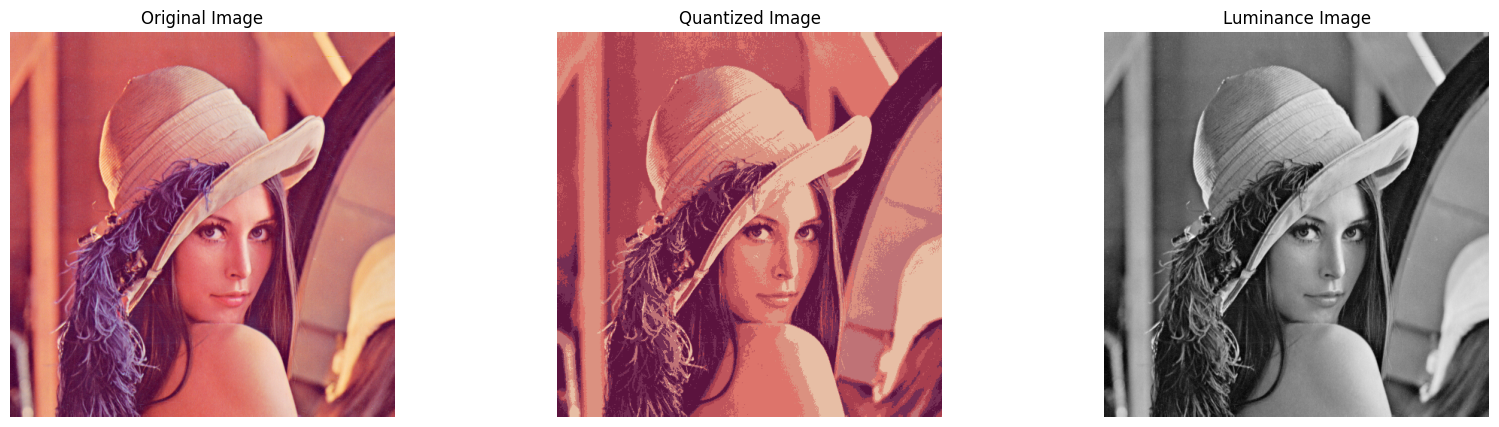

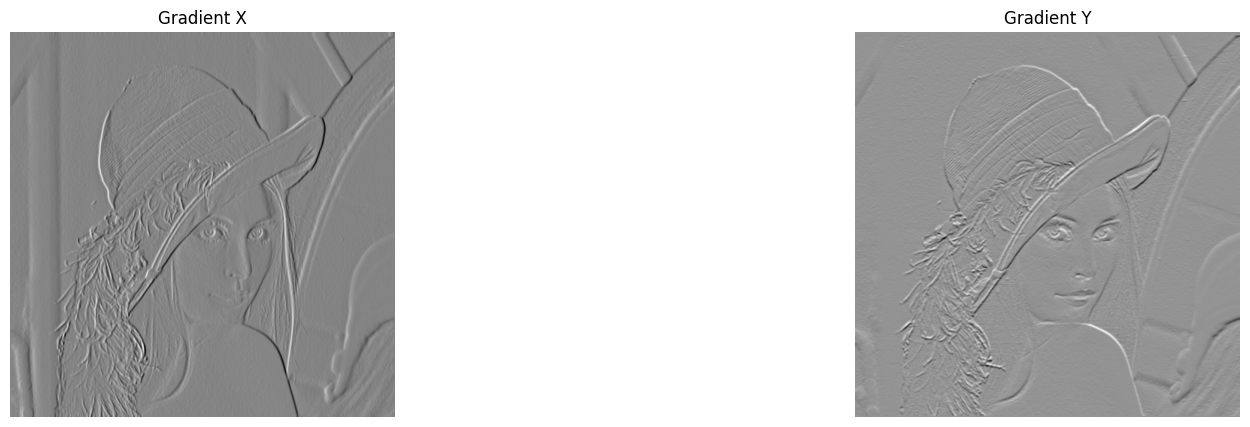

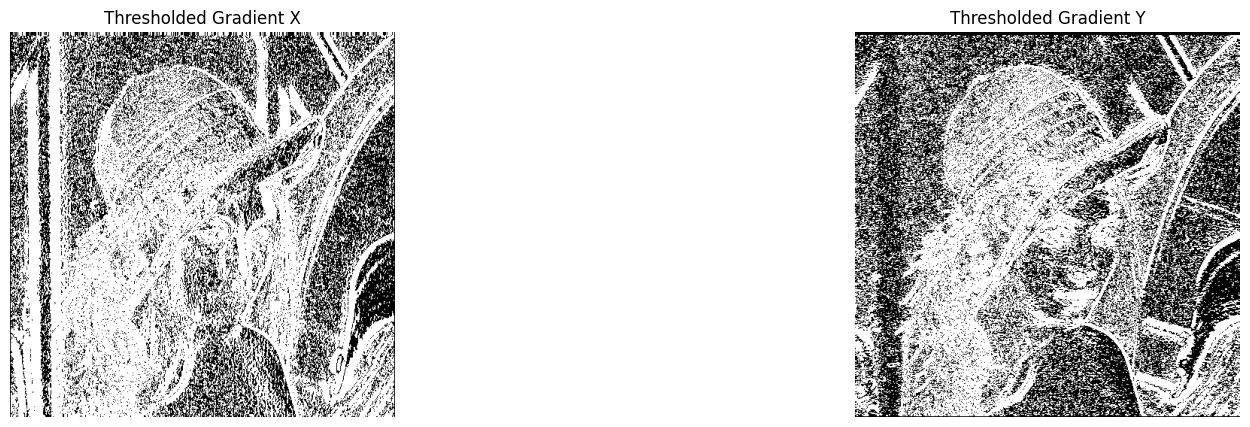

In [2]:
import requests
from io import BytesIO
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from torchvision.transforms.functional import to_tensor

# Import the provided functions
from preprocessing import quantize_image, compute_luminance, compute_gradients, threshold_gradients

# Load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image.convert("RGB")

# Visualization function
def show_images(images, titles, cmap=None):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles):
        if isinstance(img, torch.Tensor):
            img = img.permute(1, 2, 0).numpy()
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis("off")
    plt.show()

# URL of the image
image_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
original_image = load_image_from_url(image_url)

# Step 1: Quantization
num_colors = 8
quantized_image = quantize_image(original_image, num_colors)

# Step 2: Compute Luminance
luminance_image = compute_luminance(original_image)

# Step 3: Compute Gradients
grad_x, grad_y = compute_gradients(luminance_image)

# Step 4: Thresholded Gradients
grad_x_bin, grad_y_bin = threshold_gradients(grad_x, grad_y)

# Convert images for visualization
tensor_image = to_tensor(original_image)
quantized_tensor = to_tensor(quantized_image)
luminance_tensor = to_tensor(luminance_image)

# Show transformations
show_images(
    [original_image, quantized_image, luminance_image],
    ["Original Image", "Quantized Image", "Luminance Image"],
    cmap="gray"
)

show_images(
    [grad_x, grad_y],
    ["Gradient X", "Gradient Y"],
    cmap="gray"
)

show_images(
    [grad_x_bin, grad_y_bin],
    ["Thresholded Gradient X", "Thresholded Gradient Y"],
    cmap="gray"
)